In [1]:
# A simple generator function
def my_gen(val):
    n = 1
    print('This is printed first', val)
    # Generator function contains yield statements
    yield n

    n += 1
    print('This is printed second', val)
    yield n

    n += 1
    print('This is printed at last', val)
    yield n

gen_a = my_gen("ja")
# Using for loop
for item in gen_a:
    print(item)    

#print(next(gen_b))

This is printed first ja
1
This is printed second ja
2
This is printed at last ja
3


# Leer Nombres

In [1]:
import re

#Leer los nombres de la data (RGB, profundida, tipo)
def leerNombresTrain(path, cantMaxima):
    f = open(path, 'r+')
    
    pathNombresRGB = []
    pathNombresDepth = []
    clases = []
    cant = 0
    for line in f.readlines():
        
        line = line.split(" ")
        pathNombresRGB.append("SilentsData/NoSilent_"+line[0])
        pathNombresDepth.append("SilentsData/NoSilent_"+line[1])
        clases.append( int( re.sub("\D", "", line[2]) ) -1 )
        
        cant = cant + 1
        if cant>=cantMaxima:
            break
        
    f.close()
    
    return pathNombresRGB, pathNombresDepth, clases

In [2]:
cantData = 15
pathNombresRGB, pathNombresDepth, clases = leerNombresTrain('../valid_list.txt', cantData)
print(len(pathNombresRGB))
print(len(pathNombresDepth))
print(len(clases))
print(pathNombresRGB)
print(pathNombresDepth)
print(clases)

15
15
15
['SilentsData/NoSilent_valid/001/M_00001.avi', 'SilentsData/NoSilent_valid/001/M_00002.avi', 'SilentsData/NoSilent_valid/001/M_00003.avi', 'SilentsData/NoSilent_valid/001/M_00004.avi', 'SilentsData/NoSilent_valid/001/M_00005.avi', 'SilentsData/NoSilent_valid/001/M_00006.avi', 'SilentsData/NoSilent_valid/001/M_00007.avi', 'SilentsData/NoSilent_valid/001/M_00008.avi', 'SilentsData/NoSilent_valid/001/M_00009.avi', 'SilentsData/NoSilent_valid/001/M_00010.avi', 'SilentsData/NoSilent_valid/001/M_00011.avi', 'SilentsData/NoSilent_valid/001/M_00012.avi', 'SilentsData/NoSilent_valid/001/M_00013.avi', 'SilentsData/NoSilent_valid/001/M_00014.avi', 'SilentsData/NoSilent_valid/001/M_00015.avi']
['SilentsData/NoSilent_valid/001/K_00001.avi', 'SilentsData/NoSilent_valid/001/K_00002.avi', 'SilentsData/NoSilent_valid/001/K_00003.avi', 'SilentsData/NoSilent_valid/001/K_00004.avi', 'SilentsData/NoSilent_valid/001/K_00005.avi', 'SilentsData/NoSilent_valid/001/K_00006.avi', 'SilentsData/NoSilent_v

# Leer Video

In [3]:
import cv2
import numpy as np
import glob

#Se lee los videos rgb
def leer_una_seña_video(nombreVid):
    
    cap = cv2.VideoCapture('../'+nombreVid)
    vid = []
    while True:
        ret, img = cap.read()
        if not ret:
            break
        #vid.append(  cv2.resize(img, (160, 120), interpolation = cv2.INTER_CUBIC)   )    
        vid.append(  cv2.resize(img, (112, 112))   )    
        #vid.append(img)    
    return vid

# Dar formato a la data para entrenar

In [4]:
def recortarVideo(vid, tam):
    razon = len(vid)/tam
    vidR = []
    if (len(vid)<=0):
        return vidR
    for i in range(tam):
        vidR.append( vid[(int)(i*razon)] )
    del vid
    return vidR

In [5]:
def formatearVideo(vid):
    vid = np.array(vid)
    return vid

In [6]:
def juntarRGBandDepth(rgb, depth):
    return np.array( np.concatenate((rgb, depth)) )

In [7]:
def espejoVideo(vid):
    vidNew = []
    for img in vid:
        vidNew.append( cv2.flip( img, 1 ) )
    del vid
    return vidNew

In [8]:
def combinar(vid):
    vidRes = []
    vidRes.append(vid[0])
    vidRes.append(vid[3])
    vidRes.append(vid[1])
    vidRes.append(vid[4])
    vidRes.append(vid[2])
    vidRes.append(vid[5])
    return np.array(vidRes)

In [9]:
from skimage import exposure

def normalization_min_max(vid):
    vidNew = []
    
    for img in vid:
        img_norm = (img - np.min(img))/ (np.max(img) - np.min(img))
        #img_norm = exposure.equalize_adapthist(img, clip_limit=0.03)
        img_norm = exposure.equalize_hist(img_norm)

        
        vidNew.append( img_norm )
    del vid
    return vidNew

In [10]:
import numpy as np
import cv2

def substraerFondo(vid):
    vidNew = []
    first_frame = vid[0]
    first_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    first_gray = cv2.GaussianBlur(first_gray, (5, 5), 0)
    for frame in vid:

        frameAux = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frameAux = cv2.GaussianBlur(frameAux, (5, 5), 0)
        frameAux = cv2.absdiff(first_gray, frameAux)

        _, frameAux = cv2.threshold(frameAux, 20, 255, cv2.THRESH_BINARY)
        
        frame[ frameAux==0 ] = 0
        vidNew.append(frame)
    
    del vid
    return np.array(vidNew)

In [11]:
vidRGB = leer_una_seña_video(pathNombresRGB[11])        
vidRGB = recortarVideo(vidRGB, 16)    
vidRGB = np.array(vidRGB)
print(vidRGB.shape)

vidF = substraerFondo(vidRGB)
vidF.shape
print(vidF.shape)

(16, 112, 112, 3)
(16, 112, 112, 3)


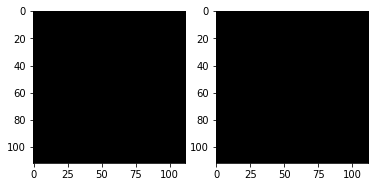

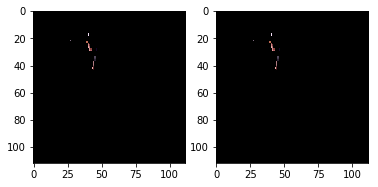

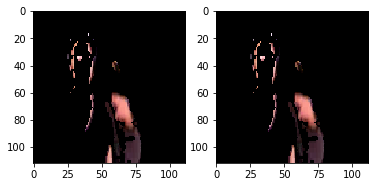

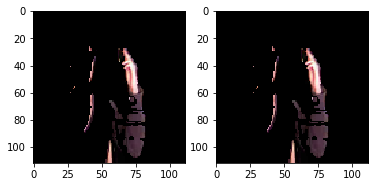

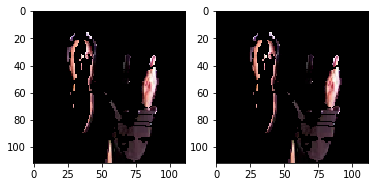

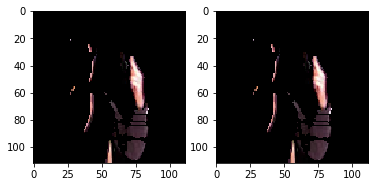

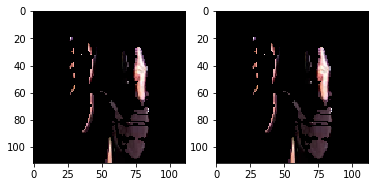

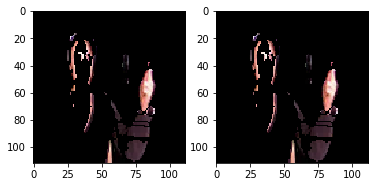

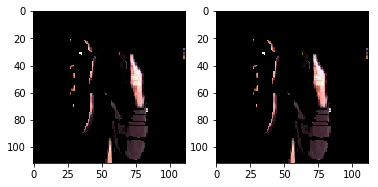

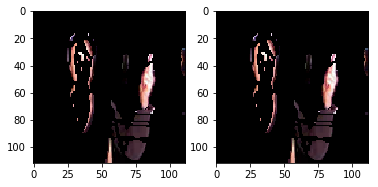

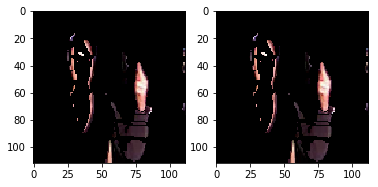

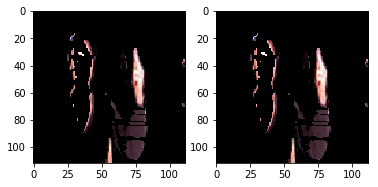

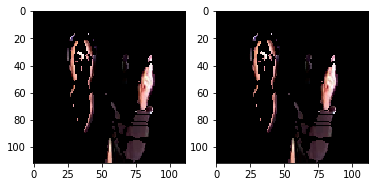

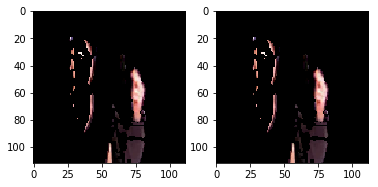

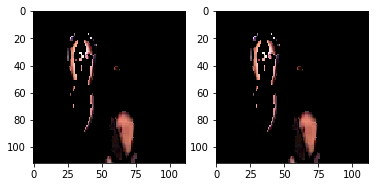

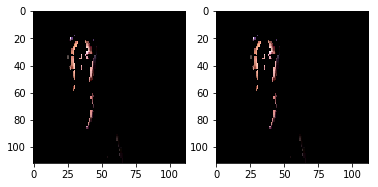

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()


for i in range(16):
    plt.subplot(1, 2, 1)
    b,g,r = cv2.split(vidRGB[i])       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
    
    plt.subplot(1, 2, 2)
    b,g,r = cv2.split(vidF[i])       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
    plt.show()
            

In [13]:
cantFrames = 16
bach_size = 8

In [14]:
cantData = 150
pathNombresRGB, pathNombresDepth, clases = leerNombresTrain('../train_list.txt', cantData)
len(pathNombresRGB)

150

In [15]:
from keras import utils
dataY_Entrada = utils.to_categorical(clases)
dataY_Entrada.shape

Using TensorFlow backend.


(150, 239)

In [16]:
def my_generator(pathNombresRGB, pathNombresDepth, cantFrames, cantData, dataY_Entrada, bach_size):
    i = 0
    boolEspejo = False
    while True:
        
        
        
        dataX = []
        dataY = []
        
        for _ in range(bach_size):
            
            #if(i >= cantData*2):
            if(i >= cantData):
                i=0
            '''
            if (boolEspejo):
                vidRGB = leer_una_seña_video(pathNombresRGB[(int)(i/2)])        
                vidRGB = recortarVideo(vidRGB, cantFrames)
                vidRGB = espejoVideo(vidRGB)
                vidRGB = formatearVideo(vidRGB)
                vidRGB = vidRGB.transpose((3, 0, 1, 2))

                vidDepth = leer_una_seña_video(pathNombresDepth[(int)(i/2)])
                vidDepth = recortarVideo(vidDepth, cantFrames)
                vidDepth = espejoVideo(vidDepth)
                vidDepth = formatearVideo(vidDepth)
                vidDepth = vidDepth.transpose((3, 0, 1, 2))

                vid = juntarRGBandDepth(vidRGB, vidDepth)
                vid.shape

                boolEspejo = False

            else:
                vidRGB = leer_una_seña_video(pathNombresRGB[(int)(i/2)])        
                vidRGB = recortarVideo(vidRGB, cantFrames)
                vidRGB = formatearVideo(vidRGB)
                vidRGB = vidRGB.transpose((3, 0, 1, 2))

                vidDepth = leer_una_seña_video(pathNombresDepth[(int)(i/2)])
                vidDepth = recortarVideo(vidDepth, cantFrames)
                vidDepth = formatearVideo(vidDepth)
                vidDepth = vidDepth.transpose((3, 0, 1, 2))

                vid = juntarRGBandDepth(vidRGB, vidDepth)
                vid.shape           

                boolEspejo = True
                '''
            
            
            vidRGB = leer_una_seña_video(pathNombresRGB[i])        
            vidRGB = recortarVideo(vidRGB, cantFrames)
            vidRGB = (vidRGB - np.min(vidRGB))/ (np.max(vidRGB) - np.min(vidRGB))
            vidRGB = formatearVideo(vidRGB)
            vidRGB = vidRGB.transpose((3, 0, 1, 2))
            
            
            vidDepth = leer_una_seña_video(pathNombresDepth[i])
            vidDepth = recortarVideo(vidDepth, cantFrames)
            vidDepth = (vidDepth - np.min(vidDepth))/ (np.max(vidDepth) - np.min(vidDepth))
            vidDepth = formatearVideo(vidDepth)
            vidDepth = vidDepth.transpose((3, 0, 1, 2))

            vid = juntarRGBandDepth(vidRGB, vidDepth)
            vid = vid.transpose((1, 2, 3, 0))
            #vid.shape
            
            #dataX.append(vid[0:4])
            dataX.append(vid)
            valY = dataY_Entrada[i]
            #valY = dataY_Entrada[(int)(i/2)]
            dataY.append(valY)
            
            
            i += 1
        yield np.array(dataX), np.array(dataY)

In [17]:
#gen_a = my_generator(pathNombresRGB, pathNombresDepth, cantFrames, cantData, dataY_Entrada, bach_size)

In [18]:
'''
vids = []
for i in range(10):
    res = next(gen_a)
    print(res[0].shape)
'''

'\nvids = []\nfor i in range(10):\n    res = next(gen_a)\n    print(res[0].shape)\n'

In [19]:
#gen_a = my_generator(pathNombresRGB, pathNombresDepth, cantFrames, cantData, dataY_Entrada, bach_size)

In [20]:
'''
import matplotlib.pyplot as plt
%matplotlib inline

res = next(gen_a)

fig = plt.figure()

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(res[0][0][i])
plt.show()
'''

'\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nres = next(gen_a)\n\nfig = plt.figure()\n\nfor i in range(16):\n    plt.subplot(4, 4, i+1)\n    plt.imshow(res[0][0][i])\nplt.show()\n'

# Entrenar

In [21]:
import numpy as np

bach_size_T = 8
bach_size_V = bach_size_T
cantFrames = 16

cantData_T = 35878
pathNombresRGB_T, pathNombresDepth_T, clases_T = leerNombresTrain('../train_list.txt', cantData_T)
print(len(pathNombresRGB_T))
dataY_Entrada_T = utils.to_categorical(clases_T)
print(dataY_Entrada_T.shape)

cantData_V = 5784
pathNombresRGB_V, pathNombresDepth_V, clases_V = leerNombresTrain('../valid_list.txt', cantData_V)
print(len(pathNombresRGB_V))
dataY_Entrada_V = utils.to_categorical(clases_V)
print(dataY_Entrada_V.shape)


# Generators
training_generator = my_generator(pathNombresRGB_T, pathNombresDepth_T, cantFrames, cantData_T, dataY_Entrada_T, bach_size_T)
validation_generator = my_generator(pathNombresRGB_V, pathNombresDepth_V, cantFrames, cantData_V, dataY_Entrada_V, bach_size_V)
#training_generator = DataGenerator(partition['train'], labels, **params)
#validation_generator = DataGenerator(partition['validation'], labels, **params)



35878
(35878, 249)
5784
(5784, 249)


## Modelo

In [22]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling3D, ZeroPadding3D, Conv3D
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.models import Model
from keras.layers import Input, Activation, Embedding, merge, LSTM, Dropout, Dense, RepeatVector, BatchNormalization, \
    TimeDistributed, Flatten, Reshape

In [23]:
def get_model(summary=False):
    """ Return the Keras model of the network
    """
    
    inputs = Input(shape=(16, 112, 112, 6))
    #inputs = Input(shape=(3, 16, 112, 112))
    
    # 1st layer group
    x = Conv3D(64, (3, 3, 3), activation='relu', padding='same', name='conv1', strides=(1, 1, 1))(inputs)
    x = MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), padding='valid', name='pool1')(x)
    
    # 2nd layer group
    x = Conv3D(128, (3, 3, 3), activation='relu', padding='same', name='conv2', strides=(1, 1, 1))(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='valid', name='pool2')(x)
    
    # 3rd layer group
    x = Conv3D(256, (3, 3, 3), activation='relu', padding='same', name='conv3a', strides=(1, 1, 1))(x)
    x = Conv3D(256, (3, 3, 3), activation='relu', padding='same', name='conv3b', strides=(1, 1, 1))(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='valid', name='pool3')(x)
    
    # 4th layer group
    x = Conv3D(512, (3, 3, 3), activation='relu', padding='same', name='conv4a', strides=(1, 1, 1))(x)
    x = Conv3D(512, (3, 3, 3), activation='relu', padding='same', name='conv4b', strides=(1, 1, 1))(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='valid', name='pool4')(x)
    
    # 5th layer group
    x = Conv3D(512, 3, 3, 3, activation='relu', padding='same', name='conv5a', strides=(1, 1, 1))(x)
    x = Conv3D(512, 3, 3, 3, activation='relu', padding='same', name='conv5b', strides=(1, 1, 1))(x)
    x = ZeroPadding3D(padding=(0, 1, 1))(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='valid', name='pool5')(x)
    x = Flatten()(x)
    
    # FC layers group
    x = Dense(4096, activation='relu', name='fc6')(x)
    x = Dropout(.5)(x)
    x = Dense(4096, activation='relu', name='fc7')(x)
    x = Dropout(.5)(x)
    predictions = Dense(249, activation='softmax', name='fc8')(x)
    
    
    model = Model(inputs=inputs, outputs=predictions)
    
    if summary:
        print(model.summary())
    return model

model = get_model(summary=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 16, 112, 112, 6)   0         
_________________________________________________________________
conv1 (Conv3D)               (None, 16, 112, 112, 64)  10432     
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 16, 56, 56, 64)    0         
_________________________________________________________________
conv2 (Conv3D)               (None, 16, 56, 56, 128)   221312    
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 8, 28, 28, 128)    0         
_________________________________________________________________
conv3a (Conv3D)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(512, (3, 3, 3), activation="relu", padding="same", name="conv5a", strides=(1, 1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(512, (3, 3, 3), activation="relu", padding="same", name="conv5b", strides=(1, 1, 1))`


In [25]:
#import keras
#from keras.models import model_from_json

#model = model_from_json(open('RNN_isolate_model_RGB_D_9.json', 'r').read())
#model.load_weights('RNN_isolate_weights_RGB_D_9.h5')

In [26]:
import keras
from keras.optimizers import Adam, SGD

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=SGD(), metrics=['acc'])
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd, metrics=['acc'])

In [27]:
from keras.callbacks import TensorBoard

#cantDataDoble_T = cantData_T*2
#cantDataDoble_V = cantData_V*2

cantDataDoble_T = cantData_T
cantDataDoble_V = cantData_V
print(bach_size_T)
print(bach_size_V)


result_train = model.fit_generator(
    generator=training_generator,
    epochs=10,
    steps_per_epoch=cantDataDoble_T // bach_size_T,
    validation_data=validation_generator,
    validation_steps=cantDataDoble_V // bach_size_V)
'''

result_train = model.fit_generator(
    generator=training_generator,
    epochs=20,
    steps_per_epoch=cantDataDoble_T // bach_size_T)
'''

8
8
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
4484/4484 [==============================] - 4202s 937ms/step - loss: 0.3801 - acc: 0.8705 - val_loss: 4.7260 - val_acc: 0.1928
Epoch 2/10
4484/4484 [==============================] - 4191s 935ms/step - loss: 0.3305 - acc: 0.8875 - val_loss: 4.4924 - val_acc: 0.2229
Epoch 3/10
4484/4484 [==============================] - 4192s 935ms/step - loss: 0.2864 - acc: 0.9023 - val_loss: 5.0229 - val_acc: 0.2267
Epoch 4/10
4484/4484 [==============================] - 4193s 935ms/step - loss: 0.2504 - acc: 0.9168 - val_loss: 4.5976 - val_acc: 0.2059
Epoch 5/10
4484/4484 [==============================] - 4195s 936ms/step - loss: 0.2248 - acc: 0.9249 - val_loss: 4.7472 - val_acc: 0.2337
Epoch 6/10
4484/4484 [==============================] - 4198s 936ms/step - loss: 0.2016 - acc: 0.9338 - val_loss: 4.7548 - val_acc: 0.2431
Epoch 7/10
4484/4484 [==============================] - 4194s 935ms/step - loss: 0.1747 - acc: 0.9434 - val_loss: 

'\n\nresult_train = model.fit_generator(\n    generator=training_generator,\n    epochs=20,\n    steps_per_epoch=cantDataDoble_T // bach_size_T)\n'

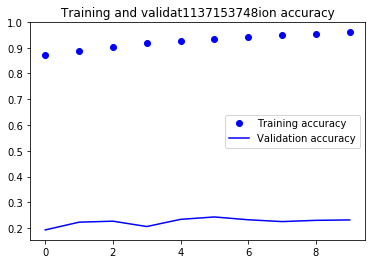

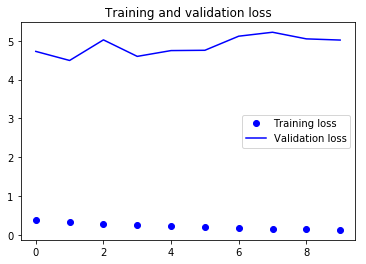

In [28]:
import matplotlib.pyplot as plt
accuracy = result_train.history['acc']
val_accuracy = result_train.history['val_acc']
loss = result_train.history['loss']
val_loss = result_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validat1137153748ion accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.show()

In [29]:
import h5py

model.save_weights('RNN_isolate_weights_RGB_D_9.h5', overwrite=True)
json_string = model.to_json()
with open('RNN_isolate_model_RGB_D_9.json', 'w') as f:
    f.write(json_string)

# Testing

Train

In [30]:
scores = model.evaluate_generator(generator=training_generator, steps=cantDataDoble_T // bach_size_T, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

4484/4484 [==============================] - 1522s 339ms/step
Test loss: 0.07569996794366565
Test accuracy: 0.9755519625334522


Valid

In [31]:
scores = model.evaluate_generator(generator=validation_generator, steps=cantDataDoble_V // bach_size_V, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

723/723 [==============================] - 246s 341ms/step
Test loss: 5.018126431424918
Test accuracy: 0.23150069156293224


Test

In [32]:
bach_size_Test = bach_size_T
cantFrames = 16

cantData_Test = 6271
pathNombresRGB_Test, pathNombresDepth_Test, clases_Test = leerNombresTrain('../test_list.txt', cantData_Test)
print(len(pathNombresRGB_Test))
dataY_Entrada_Test = utils.to_categorical(clases_Test)
print(dataY_Entrada_Test.shape)

# Generators
test_generator = my_generator(pathNombresRGB_Test, pathNombresDepth_Test, cantFrames, cantData_Test, dataY_Entrada_Test, bach_size_Test)

6271
(6271, 249)


In [33]:
scores = model.evaluate_generator(generator=test_generator, steps=cantData_Test // bach_size_Test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

783/783 [==============================] - 263s 336ms/step
Test loss: 4.809353960123707
Test accuracy: 0.29390166028097064
